import pandas as pd
import io
import requests
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
train_url = "http://www.amlbook.com/data/zip/features.train"
test_url = "http://www.amlbook.com/data/zip/features.test"

In [3]:
def URL_to_dataframe(url):
    s = requests.get(url).content
    c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, delim_whitespace=True)
    
    return c

In [4]:
def scaling(all_feature, train_number):
    intensity = np.interp(all_feature[:,0],(all_feature[:,0].min(), all_feature[:,0].max()), (0,1))
    symmetry = np.interp(all_feature[:,1],(all_feature[:,1].min(), all_feature[:,1].max()), (0,1))
    print(intensity.shape)
    print(symmetry.shape)
    processed = np.concatenate((intensity.reshape(-1,1), symmetry.reshape(-1,1)), axis=1)
    
    return processed[:train_number,:], processed[train_number:,:]

In [5]:
def binary_label(label, target_label):
    target_position = (label==target_label)
    label = label*0
    label[target_position] = 1
    
    return label

In [6]:
def get_weight(y_alpha, SVs):
    y_alpha = y_alpha.reshape(-1,1)
    weight_matrix = np.zeros((y_alpha.shape[0], 2))
    for i in range(SVs.shape[0]):
        weight_matrix[i,0:2] = SVs[i,0:2]
    
    weight_sv = y_alpha * weight_matrix
    weight = np.sum(weight_sv, axis=0)
    
    return weight

In [7]:
train_df = URL_to_dataframe(train_url)
test_df = URL_to_dataframe(test_url)

In [8]:
train_np = train_df.to_numpy()
test_np = test_df.to_numpy()

In [9]:
train_feature = train_np[:,1:3]
train_label = train_np[:,0]
test_feature = test_np[:,1:3]
test_label = test_np[:,0]

In [10]:
train_label = binary_label(train_label, 0)
test_label = binary_label(test_label, 0)

In [11]:
print(train_feature.shape)
print(train_label.shape)
print(test_feature.shape)
print(test_label.shape)

(7291, 2)
(7291,)
(2007, 2)
(2007,)


1e-05
0.001
0.1
10.0
1000.0


Text(0, 0.5, '|w|')

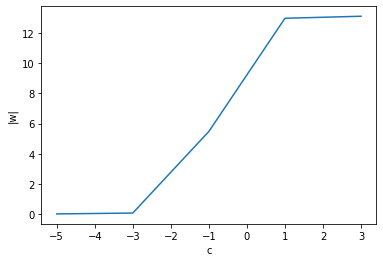

In [12]:
# 11
c_list = [1e-5, 1e-3, 1e-1, 1e1, 1e3]
log10c_list = [-5,-3,-1,1,3]
w_length_list = []

for c in c_list:
    print(c)
    clf = svm.SVC(C=c, kernel='linear')
    clf.fit(train_feature, train_label)
    
    y_alpha = clf.dual_coef_
    SVs = clf.support_vectors_
    weight = get_weight(y_alpha, SVs)
    w_length_list.append(np.sqrt(np.sum(weight*weight)))
    
plt.plot(log10c_list, w_length_list)
plt.xlabel('c')
plt.ylabel('|w|')